# Complete Data

In [80]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# This makes plots appear in the notebook
%matplotlib inline

## Data Cleaning  

In [81]:
df = pd.read_csv('thesis_combined_final.csv')

# dropping first 2 rows
df = df.drop(df.index[ :2])

# dropping questions 19 and 23 with many NAN
df = df.drop(['19', '23'], axis=1)

# re-labeling questions
df = df.rename(columns ={    
    '24':'Age',
    '25':'Position',
    '26':'Politics',
    '18':'Activities',
    '20': 'Arab_num',
    '21':'Lunch',
    '22':'Lunch_mates',
    '27':'Demo',
    '28': 'Jewish Pride',
    '29': 'Arab Pride'
})

# Re-labeling 'Politics' column
df.columns.values[-4] = 'Politics'

# Consolidating Demo column to Jewish or Arab
replacements = {'5,6': 'Jewish', 
                '5':'Jewish',
                '6': 'Jewish', 
                '1,2,4,7': 'Arab', 
                '1,3,4,7': 'Arab', 
                '1': 'Arab', 
                '2,7': 'Arab',
                '1,2,3,4,5,6,7': np.nan,
                '5,6': 'Jewish', 
                '5':'Jewish',
                '6': 'Jewish', 
                '1,2,4,7': 'Arab', 
                '1,3,4,7': 'Arab', 
                '1': 'Arab', 
                '2,7': 'Arab',
                '1,2,3,4,5,6,7': np.nan,
                '1,3,7': 'Arab', 
                '1,2,4': 'Arab', 
                'nan': 'NaN', 
                '3,7': 'Arab', 
                '1,3,4': 'Arab', 
                '1,5,7': 'Arab',
                '1,3,4,5,7': 'Arab', 
                '1,2,4,5,7': 'Arab',
                'ישראל':'Jewish',
                'ישראלי':'Jewish',
                'יהודי':'Jewish',
                'ישראלי,יהודי':'Jewish',
                'ערבי,מוסלמי,פלסטיני,ערבי ישראלי':'Arab',
                'ערבי,נוצרי,ערבי ישראלי':'Arab',
                'ערבי,מוסלמי,פלסטיני':'Arab',
                'ערבי,נוצרי,פלסטיני,ישראלי,ערבי ישראלי':'Arab',
                'נוצרי,ערבי ישראלי':'Arab',
                'ערבי,נוצרי,פלסטיני':'Arab',
                'ערבי,ישראלי,ערבי ישראלי':'Arab',
                'ערבי,מוסלמי,פלסטיני,ישראלי,ערבי ישראלי':'Arab',
                'ערבי':'Arab',
                'Israeli':'Jewish', 
                'Arab,Muslim,Palestinian':'Arab',
                'Arab':'Arab',
                'Muslim,Arab Israeli':'Arab',
                'Arab,Muslim,Christian,Palestinian,Israeli,Jewish,Arab Israeli':'Arab',
                'Arab,Muslim,Palestinian,Arab Israeli':'Arab',
                'Jewish':'Jewish',
                'Israeli,Jewish': 'Jewish'
}

df['Demo'] = df['Demo'].replace(replacements)

# Q22 How many Arab Israelis work at your current company? (change column to 1,2,3,4)

df['Arab_num'] = df['Arab_num'].replace('מעל 30', 'Over 30') # Changing hebrew string in Arab_num to a float

replacements2 = {'0-5':'1',
                 '5-10':'2',
                 '10-30':'3',
                 'Over 30':'4',
                 '05-Oct': np.nan,
                 'Oct-30': np.nan,
                }

df['Arab_num'] = df['Arab_num'].replace(replacements2)

### Changing columns to numeric values

In [82]:
# Columns with only numeric values
columns_numeric = ['2', '3', '4','5', '6','7', '8', '9', '10', 
                   '11', '12', '13', '14', '15', '16', '17', 
                   'Arab_num']
df[columns_numeric] = df[columns_numeric].astype(float)

# Column 1
df['1'] = df['1'].replace("Completely agree\n", "", regex=True)
df['1'] = df['1'].astype(float)
                   
# Column Politics
replacements3 = {'1\n':'1',
                 'מרכז\n4':'4',
                 'ימין מתון\n3':'3', 
                 'שמאל מתון\n4':'4', 
                 'ימין\n2':'2', 
                 'שמאל\n6':'6',
                 'שמאל קיצוני\n7':'7'
}

df['Politics'] = df['Politics'].replace(replacements3)
df['Politics'] = df['Politics'].astype(float)

# Age
df['Age'] = df['Age'].astype(float)

# Pride
df['Jewish Pride'] = df['Jewish Pride'].replace('מסכים/מה לחלוטין\n6', '6')
df['Jewish Pride'] = df['Jewish Pride'].astype(float)

df['Arab Pride'] = df['Arab Pride'].replace('מסכים/מה לחלוטין\n6', '6')
df['Arab Pride'] = df['Arab Pride'].replace('לא מסכים/מה בכלל\n1', '1')
df['Arab Pride'] = df['Arab Pride'].astype(float)

# Checking work
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 2 to 269
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UserLanguage  268 non-null    object 
 1   1             202 non-null    float64
 2   2             202 non-null    float64
 3   3             198 non-null    float64
 4   4             202 non-null    float64
 5   5             202 non-null    float64
 6   6             202 non-null    float64
 7   7             202 non-null    float64
 8   8             202 non-null    float64
 9   9             202 non-null    float64
 10  10            202 non-null    float64
 11  11            202 non-null    float64
 12  12            202 non-null    float64
 13  13            202 non-null    float64
 14  14            202 non-null    float64
 15  15            200 non-null    float64
 16  16            202 non-null    float64
 17  17            202 non-null    float64
 18  Activities    202 non-null    

## Exploratory Analysis

In [83]:
# How many of each demo do we have? 
display(df['Demo'].value_counts())

# Bucketing questions into groups

Work_Attitude_and_Motivation = ['1', '2', '3', '4']
Work_Relationships = ['5', '6']
Self_Identity_and_Perception = ['7', '9']
Inter_group_Relationships = ['11', '12', '13', '14']
Equality_and_Fairness = ['15','17']
Inverse_Answers = ['8', '10', '16']

Jewish    170
Arab       28
Name: Demo, dtype: int64

### Comparing means

In [84]:
# Which demo is more satisfied with their salary?
salary_sat = df.groupby('Demo')['17'].mean().reset_index()
salary_sat.columns = ['Demo', 'Mean']
display(salary_sat)

# Which demo is more connected to their company?
connected = df.groupby('Demo')['4'].mean().reset_index()
connected.columns = ['Demo', 'Mean']
display(connected)

# Which demo is more motivated by the project?
motivated = df.groupby('Demo')['2'].mean().reset_index()
motivated.columns = ['Demo', 'Mean']
display(motivated)

# Are arabs more likely to be left leaning? 
political_views = df.groupby('Demo')['Politics'].mean().reset_index()
political_views.columns = ['Demo', 'Mean']
display(political_views)

,Demo,Mean
0,Arab,4.214286
1,Jewish,4.494118


,Demo,Mean
0,Arab,4.785714
1,Jewish,4.811765


,Demo,Mean
0,Arab,4.464286
1,Jewish,4.411765


,Demo,Mean
0,Arab,5.346154
1,Jewish,3.629412


### Correlations

In [85]:
# Creating data frames for jewish and arab
jewish = df[df['Demo'] == 'Jewish']
arab = df[df['Demo'] == 'Arab']

# Among Jewish surveyers, is there a correlation between Arab_Num & Politics
corr1 = jewish['Arab_num'].corr(jewish['Politics'])
print("correlation: ", corr1)

correlation:  0.18019021910875085


### Heat Maps

In [87]:
corr_matrix = df_groups.corr()

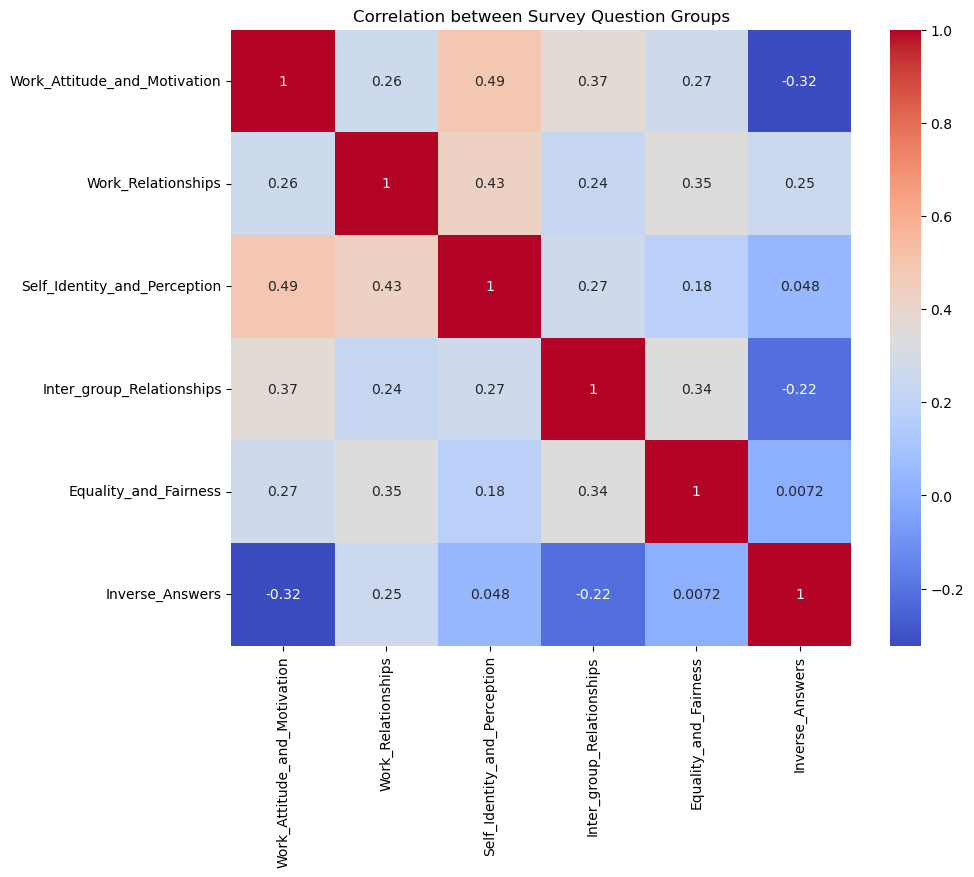

In [88]:
# Creating data frame with groups
df_groups = pd.DataFrame({
    'Work_Attitude_and_Motivation': df[Work_Attitude_and_Motivation].mean(axis=1),
    'Work_Relationships': df[Work_Relationships].mean(axis=1),
    'Self_Identity_and_Perception': df[Self_Identity_and_Perception].mean(axis=1),
    'Inter_group_Relationships': df[Inter_group_Relationships].mean(axis=1),
    'Equality_and_Fairness': df[Equality_and_Fairness].mean(axis=1),
    'Inverse_Answers': df[Inverse_Answers].mean(axis=1)
})

# Calculate the correlation matrix for the groups
corr_matrix = df_groups.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Survey Question Groups')
plt.show()

### Comparing Means Between Groups

In [89]:
# Creating new data frame with group means added
df1 = df.copy()
df1['Work_Attitude_and_Motivation'] = df1[Work_Attitude_and_Motivation].mean(axis=1)
df1['Work_Relationships'] = df1[Work_Relationships].mean(axis=1)
df1['Self_Identity_and_Perception'] = df1[Self_Identity_and_Perception].mean(axis=1)
df1['Inter_group_Relationships'] = df1[Inter_group_Relationships].mean(axis=1)
df1['Equality_and_Fairness'] = df1[Equality_and_Fairness].mean(axis=1)
df1['Inverse_Answers'] = df1[Inverse_Answers].mean(axis=1)

In [90]:
grouped_means = df1.groupby('Demo').mean().reset_index()
display(grouped_means)

,Demo,1,2,3,4,5,6,7,8,9,...,Age,Politics,Jewish Pride,Arab Pride,Work_Attitude_and_Motivation,Work_Relationships,Self_Identity_and_Perception,Inter_group_Relationships,Equality_and_Fairness,Inverse_Answers
0,Arab,3.892857,4.464286,3.807692,4.785714,4.250000,3.392857,3.214286,2.571429,3.892857,...,35.035714,5.346154,6.000000,5.481481,4.270833,3.821429,3.553571,4.142857,5.071429,3.166667
1,Jewish,4.105882,4.411765,3.809524,4.811765,4.647059,4.152941,5.164706,3.000000,3.882353,...,33.247059,3.629412,5.154762,2.000000,4.288235,4.400000,4.523529,3.744118,4.576471,3.729412


### Testing for Significance Between Means

In [98]:
from scipy.stats import ttest_ind

groups = {
    'Work_Attitude_and_Motivation': Work_Attitude_and_Motivation,
    'Work_Relationships': Work_Relationships,
    'Self_Identity_and_Perception': Self_Identity_and_Perception,
    'Inter_group_Relationships': Inter_group_Relationships,
    'Equality_and_Fairness': Equality_and_Fairness,
}

demo1 = 'Jewish'
demo2 = 'Arab'

for group_name, group_columns in groups.items():
    demo1_values = df.loc[df['Demo'] == demo1, group_columns]
    demo2_values = df.loc[df['Demo'] == demo2, group_columns]
    
    t_statistic, p_value = ttest_ind(demo1_values, demo2_values, nan_policy='omit')
    
    if (p_value < 0.05).any():
        print(f"The difference in means between {demo1} and {demo2} in the {group_name} group is significant.")
    else:
        print(f"The difference in means between {demo1} and {demo2} in the {group_name} group is not significant.")

The difference in means between Jewish and Arab in the Work_Attitude_and_Motivation group is not significant.
The difference in means between Jewish and Arab in the Work_Relationships group is significant.
The difference in means between Jewish and Arab in the Self_Identity_and_Perception group is significant.
The difference in means between Jewish and Arab in the Inter_group_Relationships group is significant.
The difference in means between Jewish and Arab in the Equality_and_Fairness group is significant.


### Data Visualization of Significant Groups

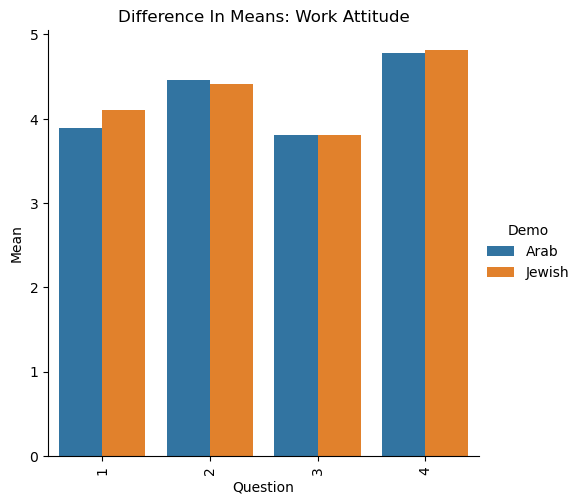

In [86]:
# Visualizing differences in Work Attitude and Motivation by Demo
df_1 = df.groupby('Demo')[Work_Attitude_and_Motivation].mean().reset_index()
df_1 = pd.melt(df_1, id_vars='Demo', var_name='Question', value_name='Mean')

sns.catplot(x='Question', y='Mean', hue='Demo', kind='bar', data=df_1, ci=None)

plt.title('Difference In Means: Work Attitude')
plt.xlabel('Question')
plt.ylabel('Mean')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show()

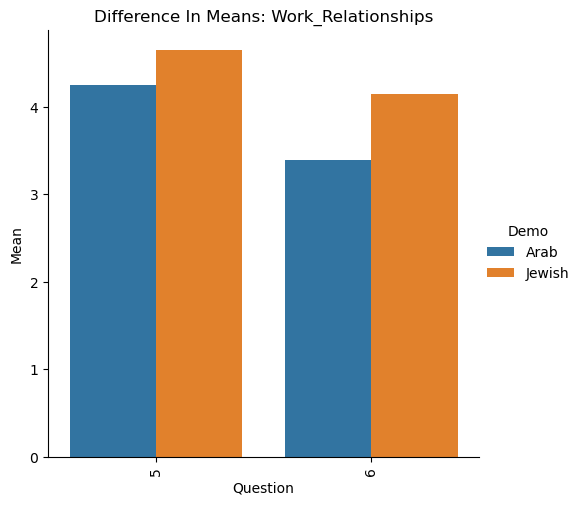

In [117]:
# Visualizing differences in Work_Relationships by Demo
df_1 = df.groupby('Demo')[Work_Relationships].mean().reset_index()
df_1 = pd.melt(df_1, id_vars='Demo', var_name='Question', value_name='Mean')

sns.catplot(x='Question', y='Mean', hue='Demo', kind='bar', data=df_1, ci=None)

plt.title('Difference In Means: Work_Relationships')
plt.xlabel('Question')
plt.ylabel('Mean')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show()

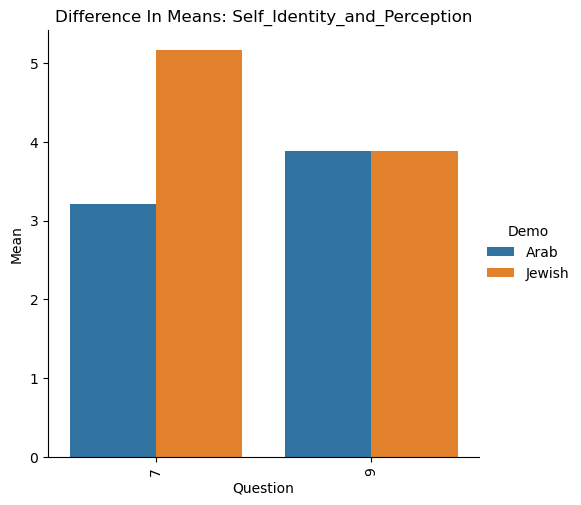

In [118]:
# Visualizing differences in Self_Identity_and_Perception by Demo
df_1 = df.groupby('Demo')[Self_Identity_and_Perception].mean().reset_index()
df_1 = pd.melt(df_1, id_vars='Demo', var_name='Question', value_name='Mean')

sns.catplot(x='Question', y='Mean', hue='Demo', kind='bar', data=df_1, ci=None)

plt.title('Difference In Means: Self_Identity_and_Perception')
plt.xlabel('Question')
plt.ylabel('Mean')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show()

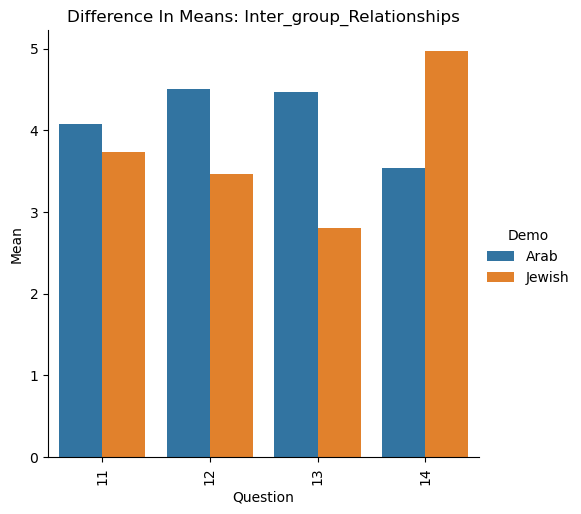

In [119]:
# Visualizing differences in Inter_group_Relationships by Demo
df_1 = df.groupby('Demo')[Inter_group_Relationships].mean().reset_index()
df_1 = pd.melt(df_1, id_vars='Demo', var_name='Question', value_name='Mean')

sns.catplot(x='Question', y='Mean', hue='Demo', kind='bar', data=df_1, ci=None)

plt.title('Difference In Means: Inter_group_Relationships')
plt.xlabel('Question')
plt.ylabel('Mean')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show()

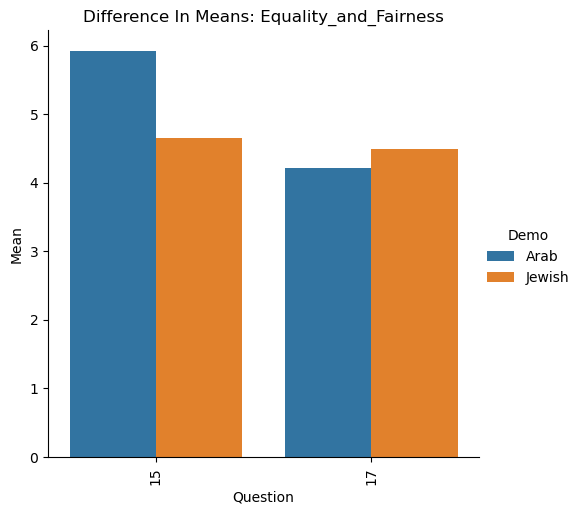

In [120]:
# Visualizing differences in Equality_and_Fairness by Demo
df_1 = df.groupby('Demo')[Equality_and_Fairness].mean().reset_index()
df_1 = pd.melt(df_1, id_vars='Demo', var_name='Question', value_name='Mean')

sns.catplot(x='Question', y='Mean', hue='Demo', kind='bar', data=df_1, ci=None)

plt.title('Difference In Means: Equality_and_Fairness')
plt.xlabel('Question')
plt.ylabel('Mean')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show()